## Aprendizaje Automatico

Ejercicio 1

In [253]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

x = sym.Symbol('x')
y = sym.Symbol('y')
f  = lambda x,y: x**2 - y**2+2*x
Grad = lambda f,x0,y0,h = 1e-10: np.array([(f(x0+h,y0)-f(x0-h,y0))/((2*h)),(f(x0,y0+h)-f(x0,y0-h))/(2*h)])
x0,y0 = 1.,1.
h = 1e-10

def plane(x,y):
    Vecg = Grad(f,1,1)
    Vec = np.array([x-1,y-1])
    point = Vec[0]*Vecg[0] + Vec[1]*Vecg[1]
    return f(1,1) + point


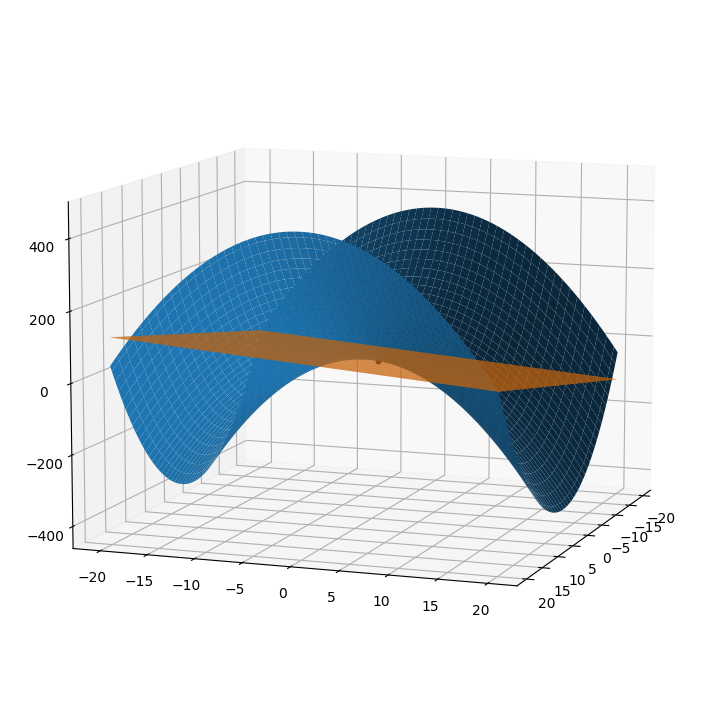

In [254]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 10, azim = 20)
x = np.linspace(-20,20,100)
y = np.linspace(-20,20,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
Z2 = plane(X,Y)
ax.plot_surface(X,Y,Z)
ax.plot_surface(X,Y,Z2)
ax.scatter(1, 1, 2, c='black', s=10)

Ejercicio 3

In [282]:
def g(x):
    if x > 2: 
        return x-2
    else:
        return -x+2

Dx = lambda f,x,h=-1e-5: (f(x+h) - f(x-h))/(2*h)

def Minimizer(f, N=300, gamma=0.01):
    
    r = np.zeros(N)
    # Seed
    r[0] = np.random.uniform(-5,5)
    
    for i in (range(1,N)):
        r[i] = r[i-1] - gamma*Dx(f,r[i-1])
        
    return r
N = 200
x = Minimizer(g,N)
cost = np.zeros(N)
for i in range(N):
    cost[i] = g(x[i])
cost[-1]


0.0008941225267262709

Para esta funcion no deberia ser posible realizar el metodo del descenso al gradiente, ya que esta funcion no es continuamente diferenciable, debido a que no es una funcion "suave" en 0, por lo que su derivada alli no esta definida. El metodo que se usa es numerico, por tanto es una aproximacion, sin embargo en la formalidad matematica esto no se podria hacer.